# Ejemplo de Descenso de Gradiente

## El problema en cuestión
Se quiere tiene el siguiente polinomio de quinto grado $p(x)=a_{0}+a_{1}x^{1}+a_{2}x^{2}+\dots a_{5}x^{5}$. El desafío está en encontrar el valor de los coeficientes $a_{0},a_{1},a_{2},\dots,a_{5}$ que mejor aproximen $p(x)$ a la función $\sin(x)$ en el intervalo de $x\in[-3,3]$.

### Función de costo
Esta situación puede plantearse como una función de costo, cuyos parámetros son los coeficientes de $p(x)$ a encontrar. Una de las formas por medio de las cuales podemos aproximar lo mejor posible $p(x)$ a $\sin(x)$ es tratando de minimizar el error cuadrático medio, es decir, utilizando [[mínimos cuadrados]]. De esta forma tendríamos la siguiente función de costo:

$$\theta(a_{0},a_{1},a_{2},\dots,a_{5})=\int_{-3}^{3} (p(x)-\sin(x))^{2}\, dx$$

Esta sería la función de costo a minimizar por medio del [[descenso de gradiente]], por medio de la cual realizaremos una estimación inicial de un valor $\underline{a}$ y se ajustará el valor por medio de la siguiente fórmula iterativa:

$$\underline{a}_{n+1}=\underline{a}_{n}-\alpha \nabla\theta(\underline{a}_{n})$$

### Gradiente de la función de costo

Para obtener el gradiente de la función de costo, nos apoyaremos de la notación sigma de $p(x)$.

$$\theta(a_{0},a_{1},a_{2},\dots,a_{5})=\int_{-3}^{3}\left( \sum^{ 5 }_{ k = 0 }a_{k}x^{k} -\sin(x) \right)^{2}\, dx$$

Derivamos $\theta$ en función de los coeficientes del polinomio $p(x)$, que sería derivar $\theta$ en función de cada $a_{j}$:

$$\frac{ \partial \theta }{ \partial a_{j} } = \frac{ \partial  }{ \partial a_{j} } \int_{-3}^{3}\left( \sum^{ 5 }_{ k = 0 }a_{k}x^{k}-\sin(x) \right)^{2}\, dx =\int_{-3}^{3}\frac{ \partial  }{ \partial a_{j} } \left( \sum^{ 5 }_{ k = 0 }a_{k}x^{k}-\sin(x) \right)^{2}\, dx $$
El intercambio del orden de diferenciación e integración es posible gracias el [[Teorema de Leibniz]] para diferenciar integrales con parámetros. Por lo tanto, se tiene que:
$$\frac{ \partial \theta }{ \partial a_{j} } = 2\int_{-3}^{3} x^{j}\,  (p(x)-\sin(x))^{2}\, dx $$
El gradiente entonces tiene la forma:
$$\nabla\theta=2\begin{bmatrix}
\int_{-3}^{3} x^{0}\, (p(x)-\sin(x))^{2} \, dx  \\
\int_{-3}^{3} x^{1}\, (p(x)-\sin(x))^{2} \, dx  \\
\int_{-3}^{3} x^{2}\, (p(x)-\sin(x))^{2} \, dx \\
\vdots \\
\int_{-3}^{3} x^{5}\, (p(x)-\sin(x))^{2} \, dx
\end{bmatrix}$$

Calcular el gradiente de forma analítica puede resultar muy complicado, pues es el producto de dos funciones que tiene que integrarse, por lo que se recurre a métodos numéricos para aproximar el valor de los componentes del gradiente.

## Solución en Python
Para facilitar las cosas, se importan las librerías `numpy` y `matplotlib` para poder realizar operaciones matemáticas avanzadas. Para calcular con precisión las integrales que componen al gradiente $\nabla\theta$, discretizamos el intervalo para calcular por medio de sumas de Riemann.

In [1]:
import numpy as np

x = np.linspace(-3, 3, 1000)           # arreglo de pasos uniformes
dx = x[1] - x[0]                       # diferencial de cada paso

Inicializamos varias cosas:
- Coeficientes aleatorios, pero de un valor pequeño.
- La función a aproximar
- La tasa de aprendizaje
- El número de iteraciones
- Un vector con las potencias del polinomio de grado quinto

In [2]:
a = np.random.randn(6) * 0.1
target = np.sin(x)
learning_rate = 1e-6
num_iters = 3000
powers = np.vstack([x**i for i in range(6)])

Ahora, se procede con la iteración del descenso de gradiente. Por cada iteración, se calcula el valor del polinomio con los coeficientes aleatorios por medio de un producto punto entre el vector de las potencias y el de los coeficientes.

Se estima el error restando a la evaluación de $p(x)$ el valor de $\sin(x)$. Esto da como resultado un arreglo, el error por cada paso en el intervalo $[-3, 3]$. 

Para obtener el gradiente, multiplicamos el error por la transposición del arreglo de potencias de x, para que el producto punto funcione. Luego se multiplica por el diferencial de x y por 2 para; y la el producto punto de potencias con el arreglo del error ya genera una sumatoria.

La instrucción `np.dot(error, powers.T)` es equivalente a:

$$
\left[ 
    \sum^{1000}_{i=1}e_i {x_i}^{0}\, , \,
    \sum^{1000}_{i=1}e_i {x_i}^{1}\, , \,
    \sum^{1000}_{i=1}e_i {x_i}^{2}\, , \,
    \sum^{1000}_{i=1}e_i {x_i}^{3}\, , \,
    \sum^{1000}_{i=1}e_i {x_i}^{4}\, , \,
    \sum^{1000}_{i=1}e_i {x_i}^{5}
\right]
$$

Una vez optenido el gradiente, se multiplica por la taza de aprendizaje y se resta a los coeficientes aleatorios.

In [3]:
for it in range(num_iters):
    px = np.dot(a, powers) 
    error = px - target
    gradient = 2 * np.dot(error, powers.T) * dx 
    a -= learning_rate * gradient

Una vez terminado el proceso, se imprimen los coeficientes obtenidos tras el número de iteraciones. También se puede verificar la forma de la función obtenida y compararla con la función $\sin(x)$ con la librería `matplotlib`.

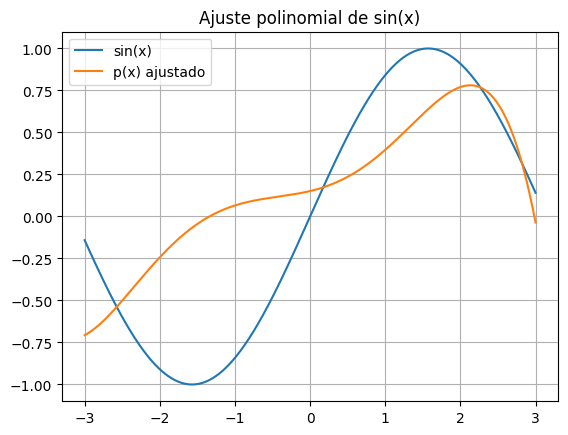

Coeficientes finales:
a0 = 0.151348
a1 = 0.107377
a2 = 0.096998
a3 = 0.065323
a4 = -0.017228
a5 = -0.007203


In [4]:
import matplotlib.pyplot as plt

plt.plot(x, target, label='sin(x)')
plt.plot(x, np.dot(a, powers), label='p(x) ajustado')
plt.legend()
plt.title("Ajuste polinomial de sin(x)")
plt.grid(True)
plt.show()

print("Coeficientes finales:")
for i, coef in enumerate(a):
    print(f"a{i} = {coef:.6f}")

En un solo código, se ve así:

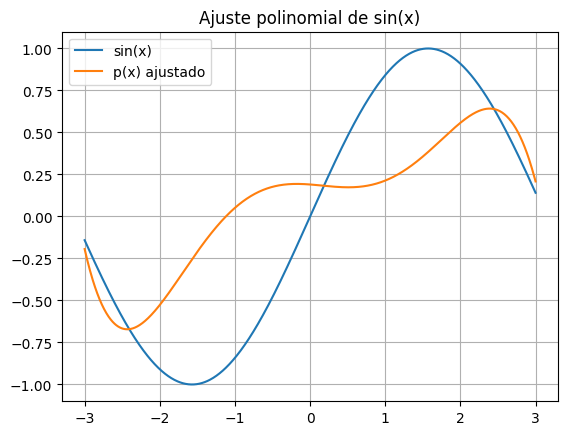

Coeficientes finales:
a0 = 0.190449
a1 = -0.034141
a2 = -0.062462
a3 = 0.128328
a4 = 0.004679
a5 = -0.013009


In [124]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 1000)
dx = x[1] - x[0]

a = np.random.randn(6) * 0.1
target = np.sin(x)
learning_rate = 1e-5
num_iters = 1000
powers = np.vstack([x**i for i in range(6)])

for it in range(num_iters):
    px = np.dot(a, powers) 
    error = px - target
    gradient = 2 * np.dot(error, powers.T) * dx 
    a -= learning_rate * gradient

plt.plot(x, target, label='sin(x)')
plt.plot(x, np.dot(a, powers), label='p(x) ajustado')
plt.legend()
plt.title("Ajuste polinomial de sin(x)")
plt.grid(True)
plt.show()

print("Coeficientes finales:")
for i, coef in enumerate(a):
    print(f"a{i} = {coef:.6f}")

## But this is not good enough for me
Encontramos un mínimo local que asemeja a $p(x)$ lo mejor que puede con $\sin(x)$, pero el problema es que ese mínimo local no es muy bueno que digamos. Queremos uno que minimize el error aún más sin tener que estar iterando muchas veces esperando una buena posición.

Es por eso que espero poder utilizar un método de descenso de gradiente con momento. El concepto es relativamente sencillo: Cuando una pelota deciende por una colina, esta posee momento; y si llegara a ser detenida por un hoyo pequeño, si tiene suficiente momento, es posible que salte de ese pequeño valle para llegar a uno más profundo.

### La fórmula
$$
\begin{align*}
v_{t} &= \beta v_{t-1} + (1-\beta) \nabla \theta(\underline{a}_t) \\
\underline{a}_{t+1} &= \underline{a}_t - \alpha v_t
\end{align*}
$$

La tasa de incremento de velocidad $\beta$ usualmente está por el rango de $0.9$. En cuanto a la velocidad inicial $v_0$, esta suele ser $0$.

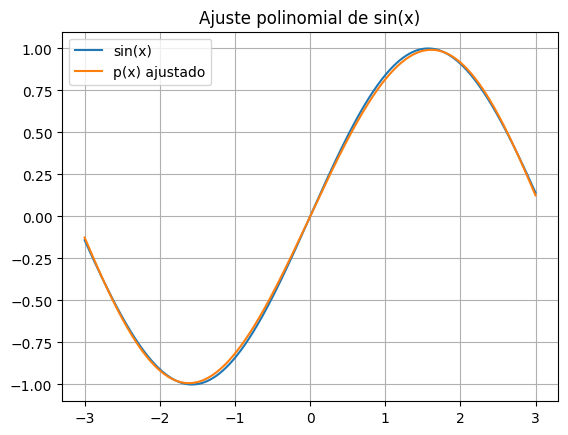

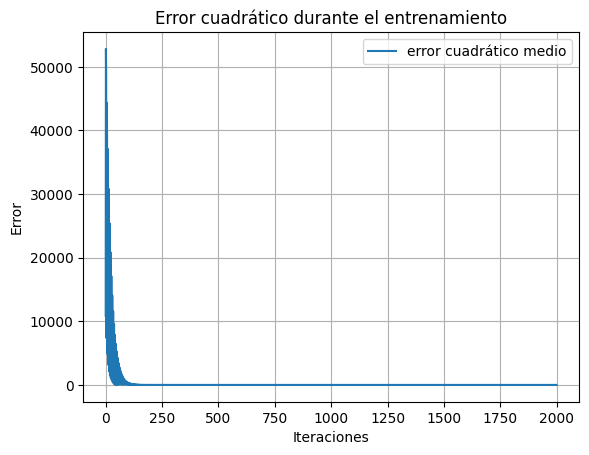

Coeficientes finales:
a0 = -0.000039
a1 = 0.953298
a2 = 0.000024
a3 = -0.141702
a4 = -0.000003
a5 = 0.004491


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 1000)
dx = x[1] - x[0]

a = np.random.randn(6)
target = np.sin(x)
learning_rate = 1e-5
num_iters = 2000
powers = np.vstack([x**i for i in range(6)])
momentum_factor = 0.95
v = np.zeros_like(a)

errors = []

for i in range(num_iters):
    # Obtener el gradiente
    px = np.dot(a, powers) 
    error = px - target
    gradient = 2 * np.dot(error, powers.T) * dx 

    # Obtener nueva velocidad
    v = (momentum_factor * v) + (1 - momentum_factor) * gradient

    # Obtener nuevos coeficientes
    a -= learning_rate * v

    # Evaluando función de error cuadrático
    cost = np.sum(error**2) * dx
    errors.append(cost)

plt.plot(x, target, label='sin(x)')
plt.plot(x, np.dot(a, powers), label='p(x) ajustado')
plt.legend()
plt.title("Ajuste polinomial de sin(x)")
plt.grid(True)
plt.show()

plt.plot(errors, label='error cuadrático medio')
plt.legend()
plt.title("Error cuadrático durante el entrenamiento")
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.grid(True)
plt.show()

print("Coeficientes finales:")
for i, coef in enumerate(a):
    print(f"a{i} = {coef:.6f}")

Coeficientes con descenso de gradiente clásico
Iteraciones: 1000 | Tasa de aprendizaje: 1e-06
-----------------------
a0 = -0.163706
a1 = 0.075233
a2 = 0.006732
a3 = 0.130026
a4 = 0.002698
a5 = -0.015359

Coeficientes con descenso de gradiente con momento
Iteraciones: 1000 | Tasa de aprendizaje: 0.001 | Factor de momento: 0.95
-----------------------
a0 = -0.008373
a1 = 0.819149
a2 = 0.005185
a3 = -0.086699
a4 = -0.000554
a5 = -0.000371



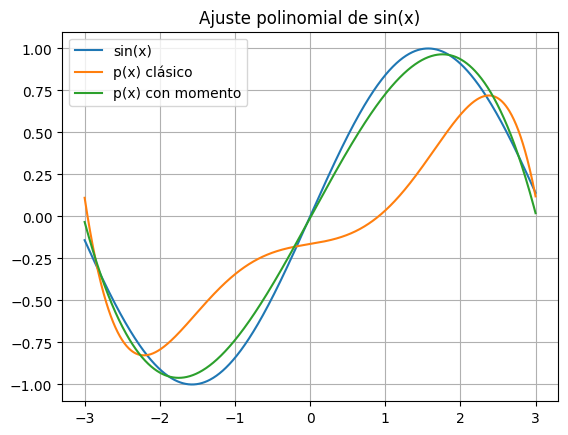

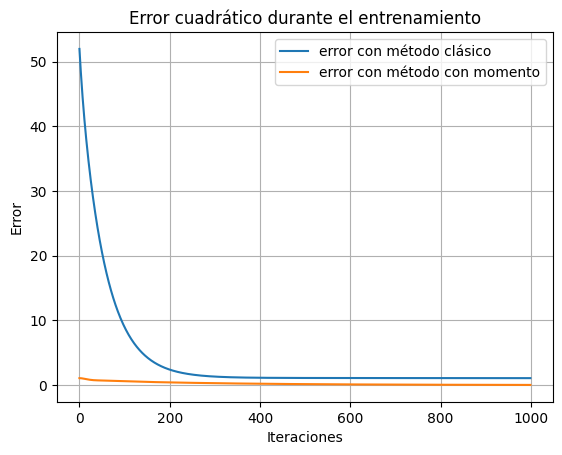

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Discretización del intervalo
x = np.linspace(-3, 3, 1000)
dx = x[1] - x[0]  # paso uniforme

# 2. Inicializar coeficientes aleatorios
a = np.random.randn(6) * 0.1

# 3. Descenso de gradiente
def classic_descent(coef, target, learning_rate, num_iters=1000):
    errors = [] # Para guardar el historial del error
    powers = np.vstack([x**i for i in range(6)])  # matriz de base polinomial

    for it in range(num_iters):
        # Calcular p(x)
        px = np.dot(coef, powers)  # evaluación del polinomio

        # Error
        error = px - target

        # Aproximación de la integral del gradiente
        gradient = 2 * np.dot(error, powers.T) * dx  # vector de derivadas parciales

        # Actualizar coeficientes
        coef -= learning_rate * gradient

        # Calcular y guardar el error total
        cost = np.sum(error**2) * dx
        errors.append(cost)
    
    print("Coeficientes con descenso de gradiente clásico")
    print(f"Iteraciones: {num_iters} | Tasa de aprendizaje: {learning_rate}\n-----------------------")
    for i, num in enumerate(coef):
        print(f"a{i} = {num:.6f}")
    print("")
    
    return np.dot(coef, powers), errors

# 4. Descenso de gradiente con momento
def descent_with_momentum(coef, target, learning_rate, momentum_factor, num_iters=1000):
    errors = []
    powers = np.vstack([x**i for i in range(6)])
    v = np.zeros_like(coef)

    for i in range(num_iters):
        px = np.dot(coef, powers) 
        error = px - target
        gradient = 2 * np.dot(error, powers.T) * dx 

        # Obtener nueva velocidad
        v = (momentum_factor * v) + (1 - momentum_factor) * gradient

        # Obtener nuevos coeficientes
        coef -= learning_rate * v

        # Evaluando función de error cuadrático
        cost = np.sum(error**2) * dx
        errors.append(cost)

    print("Coeficientes con descenso de gradiente con momento")
    print(f"Iteraciones: {num_iters} | Tasa de aprendizaje: {learning_rate} | Factor de momento: {momentum_factor}\n-----------------------")
    for i, num in enumerate(coef):
        print(f"a{i} = {num:.6f}")
    print("")

    return np.dot(coef, powers), errors

approx_one, errors_one = classic_descent(
    coef= a, 
    target= np.sin(x),
    learning_rate= 1e-6
)

approx_two, errors_two = descent_with_momentum(
    coef= a,
    target= np.sin(x),
    learning_rate= 1e-3,
    momentum_factor= 0.95
)

# Mostrar resultados
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, approx_one, label='p(x) clásico')
plt.plot(x, approx_two, label='p(x) con momento')
plt.legend()
plt.title("Ajuste polinomial de sin(x)")
plt.grid(True)
plt.show()

# Error vs iteraciones
plt.plot(errors_one, label='error con método clásico')
plt.plot(errors_two, label='error con método con momento')
plt.legend()
plt.title("Error cuadrático durante el entrenamiento")
plt.xlabel("Iteraciones")
plt.ylabel("Error")
plt.grid(True)
plt.show()
